# IS362 Final Project
Michael Hernandez

Timothy Lynch

In [70]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
%matplotlib inline

# For the HTML Data we used BeautifulSoup to pull the data
res = requests.get("https://www.cdc.gov/nchs/pressroom/states/newyork/newyork.htm")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')
# this builds a list of tables
df = pd.read_html(str(table))

# The final row in the table is not data I want (it's a subtitle), so I'll loop through the tables and delete that row
# Some extra cleanup - eliminated the numeric indexes from the labels using regex

for dataframe in df:
    dataframe.drop(dataframe.tail(1).index,inplace=True)
    dataframe.iloc[:,0] = dataframe.iloc[:,0].str.replace('\d+\.', '')
    dataframe.rename(columns={ dataframe.columns[0]: "Cause Name", dataframe.columns[2]: "Rate" }, inplace=True)

# Next I want to create the data frames from the list of data frames we created.  
# I'll pull the data using their index locations

frames = [df[1], df[5], df[9], df[13]]

frames[0]['Year'] = 2017
frames[1]['Year'] = 2016
frames[2]['Year'] = 2015
frames[3]['Year'] = 2014

# To make it clearer/easier to verify data, I'm building out descriptive dataframe names:

ny_death_data_2017 = frames[0]
ny_death_data_2016 = frames[1]
ny_death_data_2015 = frames[2]
ny_death_data_2014 = frames[3]


The dataframes are in, let's look at the format of one of them:

In [71]:
ny_death_data_2017

,Cause Name,Deaths,Rate,State Rank*,U.S. Rate**,Year
0,Heart Disease,44092,171.2,17th,165.0,2017
1,Cancer,34956,141.2,41st,152.5,2017
2,Accidents,7687,35.5,49th,49.4,2017
3,Chronic Lower Respiratory Diseases,7258,28.9,48th,40.9,2017
4,Stroke,6264,24.6,50th,37.6,2017
5,Flu/Pneumonia,4517,17.7,10th,14.3,2017
6,Diabetes,4176,16.8,47th,21.5,2017
7,Alzheimer’s disease,3521,13.2,50th,31.0,2017
8,Hypertension,2699,10.4,11th,9.0,2017
9,Septicemia,2296,9.1,28th,10.6,2017


I'd like to remove the cells that do not match Tim's data, so let's drop them from all of our dataframes:

In [72]:
for df in frames:
    df.drop(['Rate', 'State Rank*', 'U.S. Rate**'], axis=1, inplace=True)
ny_death_data_2017

,Cause Name,Deaths,Year
0,Heart Disease,44092,2017
1,Cancer,34956,2017
2,Accidents,7687,2017
3,Chronic Lower Respiratory Diseases,7258,2017
4,Stroke,6264,2017
5,Flu/Pneumonia,4517,2017
6,Diabetes,4176,2017
7,Alzheimer’s disease,3521,2017
8,Hypertension,2699,2017
9,Septicemia,2296,2017


In order to perform any graphing/comparisons of data, we need our data to be numeric type - running a .dtype on our Deaths column, I found that the data type was an object.  Here I convert the data type to numeric so we can use that death data later on.

In [73]:
ny_death_data_2015['Deaths'].dtype

dtype('O')

In [74]:
for df in frames:
    df["Deaths"] = pd.to_numeric(df["Deaths"])
ny_death_data_2015['Deaths'].dtype

dtype('int64')

Now that our data is free of type problems and is in the proper format, I'll combine the list of dataframes into one dataframe with wide data.

In [95]:
result = pd.concat(frames)
result

,Cause Name,Deaths,Year
0,Heart Disease,44092,2017
1,Cancer,34956,2017
2,Accidents,7687,2017
3,Chronic Lower Respiratory Diseases,7258,2017
4,Stroke,6264,2017
5,Flu/Pneumonia,4517,2017
6,Diabetes,4176,2017
7,Alzheimer’s disease,3521,2017
8,Hypertension,2699,2017
9,Septicemia,2296,2017


Let's do some data exploration - first I'll look to compare all death types by year, we'll do a pivot table to get a list of deaths per year so we can graph out the top 10 causes of death by year.

In [108]:
graph_data = result.pivot(index='Year', columns='Cause Name', values='Deaths')
graph_data

Cause Name,Accidents,Alzheimer’s disease,Cancer,Chronic Lower Respiratory Disease,Chronic Lower Respiratory Diseases,Diabetes,Flu/Pneumonia,Heart Disease,Hypertension,Kidney Disease,Septicemia,Stroke
Year,,,,,,,,,,,,
2014,5945.0,2639.0,35392.0,6806.0,NaN,4064.0,4702.0,43116.0,NaN,2207.0,2568.0,6212.0
2015,6515.0,3174.0,35089.0,7109.0,NaN,4045.0,4881.0,44450.0,2287.0,NaN,2601.0,6292.0
2016,7354.0,3349.0,35368.0,NaN,6860.0,4038.0,4513.0,44076.0,2468.0,NaN,2545.0,6258.0
2017,7687.0,3521.0,34956.0,NaN,7258.0,4176.0,4517.0,44092.0,2699.0,NaN,2296.0,6264.0


And we will plot out that data using Matplotlib

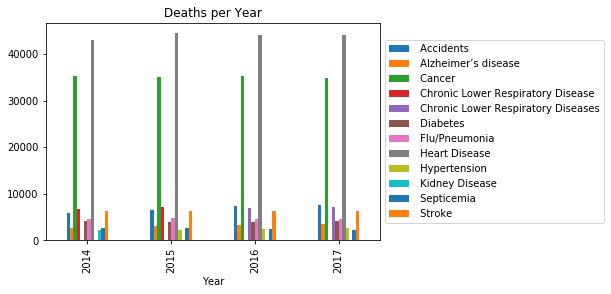

In [107]:
f = plt.figure()
plt.title('Deaths per Year', color='black')
graph_data.plot(kind='bar', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

That's a big confusing graph, with too much data to reliably read.  Let's limit the data to the top three causes of death per year only.  

In [109]:
top3_deaths = result.groupby('Year').head(3).pivot(index='Year', columns='Cause Name', values='Deaths')
top3_deaths

Cause Name,Accidents,Cancer,Chronic Lower Respiratory Disease,Heart Disease
Year,,,,
2014,NaN,35392.0,6806.0,43116.0
2015,NaN,35089.0,7109.0,44450.0
2016,7354.0,35368.0,NaN,44076.0
2017,7687.0,34956.0,NaN,44092.0


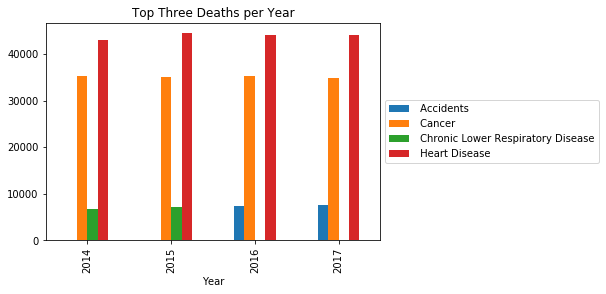

In [110]:
f = plt.figure()
plt.title('Top Three Deaths per Year', color='black')
top3_deaths.plot(kind='bar', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

We can see in this graph that CLRD was overtaken by accidents after 2015, possibly due to the population in New York smoking less since the smoking ban.  